In [1]:
import numpy as np
import pandas as pd 
import string

In [2]:
train = pd.read_csv('../input/train_dataset.csv')
test = pd.read_csv('../input/test_dataset.csv')

In [3]:
train.head()

,ID,Essayset,min_score,max_score,score_1,score_2,score_3,score_4,score_5,clarity,coherent,EssayText
0,1,1.0,0,3,1,1,1.0,1.0,1.0,average,worst,Some additional information that we would need...
1,2,1.0,0,3,1,1,NaN,1.5,1.0,excellent,worst,"After reading the expirement, I realized that ..."
2,3,1.0,0,3,1,1,1.0,1.0,1.5,worst,above_average,"What you need is more trials, a control set up..."
3,4,1.0,0,3,0,0,0.0,0.0,1.0,worst,worst,The student should list what rock is better an...
4,5,1.0,0,3,2,2,2.0,2.5,1.0,above_average,worst,For the students to be able to make a replicat...


In [4]:
train.shape

(17043, 12)

In [5]:
train.dtypes

ID             int64
Essayset     float64
min_score      int64
max_score      int64
score_1        int64
score_2        int64
score_3      float64
score_4      float64
score_5      float64
clarity       object
coherent      object
EssayText     object
dtype: object

In [6]:
train.isna().sum()

ID             0
Essayset     157
min_score      0
max_score      0
score_1        0
score_2        0
score_3      147
score_4      136
score_5      144
clarity      138
coherent     145
EssayText      0
dtype: int64

In [7]:
test.isna().sum()

ID           0
Essayset     0
min_score    0
max_score    0
clarity      0
coherent     0
EssayText    0
dtype: int64

Let's Proceed with some EDA

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

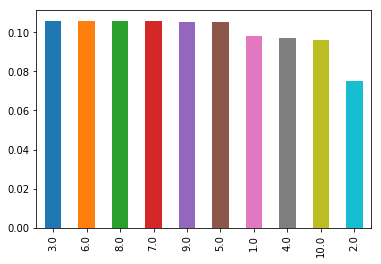

In [9]:
train['Essayset'].value_counts(normalize=True).plot.bar()

A fairly uniform distribution is present

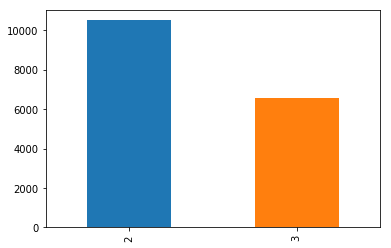

In [10]:
train['max_score'].value_counts().plot.bar()

Let's try to impute the missing values for each of the columns

One good way to impute the missing value of EassaySet column is to take the advantage of the fact that essay set {1,2,5,6} has the max value of 10 and rest have the max value of 2.

So if the max score for the row is 3, I'll be imputing the set with the highest mode in {1,2,5,6} else with the mode of remaning value

In [11]:
from collections import defaultdict

def count_value(df):
        dic = defaultdict(int)
        dic1 = defaultdict(int)
        df = df.dropna()
        for val in df['Essayset']:
            if val in [1.0,2.0,5.0,6.0]:
                dic[val]+=1
            else:
                dic1[val]+=1
        return dic,dic1

In [12]:
X = train.copy()
X_test = test.copy()

In [13]:
count_value(X)

(defaultdict(int, {1.0: 1603, 2.0: 1225, 5.0: 1693, 6.0: 1703}),
 defaultdict(int,
             {3.0: 1714,
              4.0: 1568,
              7.0: 1710,
              8.0: 1715,
              9.0: 1704,
              10.0: 1541}))

In [14]:
X.loc[(X['Essayset'].isna() == True) & (X['max_score'] == 3),['Essayset']] = 6.0
X.loc[(X['Essayset'].isna() == True) & (X['max_score'] == 2),['Essayset']] = 8.0

So if the value of Eassayset is missing and the max marks for the row is 3 we will be imputing the value of 6.0 and if the max marks is 2 we will impute 8.0

In [15]:
import seaborn as sns

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


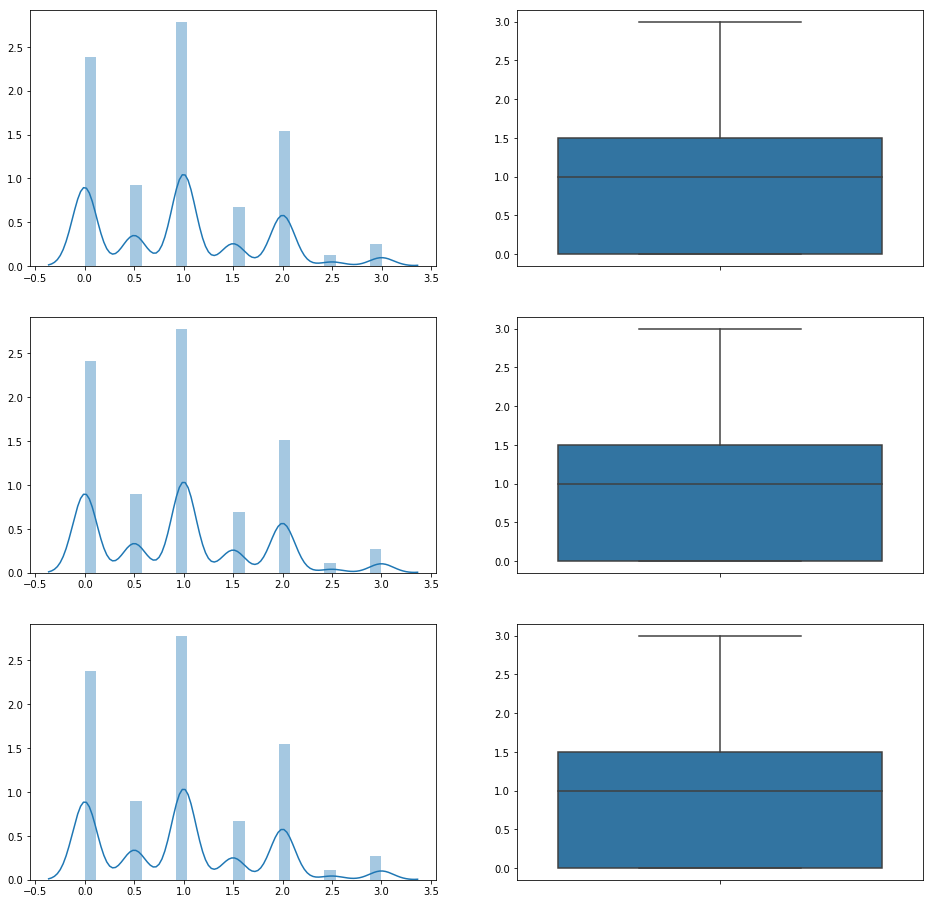

In [16]:
plt.figure(1,figsize=(16,16))


plt.subplot(321)
sns.distplot(X.loc[X['score_3'].isna()!=True,['score_3']])
plt.subplot(322)
sns.boxplot(y=X.loc[X['score_3'].isna()!=True,['score_3']])

plt.subplot(323)
sns.distplot(X.loc[X['score_4'].isna()!=True,['score_4']])
plt.subplot(324)
sns.boxplot(y=X.loc[X['score_4'].isna()!=True,['score_4']])

plt.subplot(325)
sns.distplot(X.loc[X['score_5'].isna()!=True,['score_5']])
plt.subplot(326)
sns.boxplot(y=X.loc[X['score_5'].isna()!=True,['score_5']])

plt.show()

We will be imputying the missing values of scores by taking the mean score for each category of max_marks

In [17]:
mean_3_3 = np.mean(train.loc[train['max_score']==3,'score_3'])
mean_4_3 = np.mean(train.loc[train['max_score']==3,'score_4'])
mean_5_3 = np.mean(train.loc[train['max_score']==3,'score_5'])

mean_3_2 = np.mean(train.loc[train['max_score']==2,'score_3'])
mean_4_2 = np.mean(train.loc[train['max_score']==2,'score_4'])
mean_5_2 = np.mean(train.loc[train['max_score']==2,'score_5'])

In [18]:
X.loc[(X['score_3'].isna()==True) & (X['max_score']==3),'score_3'] = mean_3_3
X.loc[(X['score_4'].isna()==True) & (X['max_score']==3),'score_4'] = mean_4_3
X.loc[(X['score_5'].isna()==True) & (X['max_score']==3),'score_5'] = mean_5_3

X.loc[(X['score_3'].isna()==True) & (X['max_score']==2),'score_3'] = mean_3_2
X.loc[(X['score_4'].isna()==True) & (X['max_score']==2),'score_4'] = mean_4_2
X.loc[(X['score_5'].isna()==True) & (X['max_score']==2),'score_5'] = mean_5_2

In [19]:
X.isna().sum()

ID             0
Essayset       0
min_score      0
max_score      0
score_1        0
score_2        0
score_3        0
score_4        0
score_5        0
clarity      138
coherent     145
EssayText      0
dtype: int64

Computing the average of score_1...score_5

In [20]:
X['score'] = X.loc[:,['score_1','score_2','score_3','score_4','score_5']].mean(axis=1)
X = X.drop(labels = ['score_1','score_2','score_3','score_4','score_5'],axis =1)

In [21]:
X['score'] = X['score'].round().astype('category')
X.head()

,ID,Essayset,min_score,max_score,clarity,coherent,EssayText,score
0,1,1.0,0,3,average,worst,Some additional information that we would need...,1.0
1,2,1.0,0,3,excellent,worst,"After reading the expirement, I realized that ...",1.0
2,3,1.0,0,3,worst,above_average,"What you need is more trials, a control set up...",1.0
3,4,1.0,0,3,worst,worst,The student should list what rock is better an...,0.0
4,5,1.0,0,3,above_average,worst,For the students to be able to make a replicat...,2.0


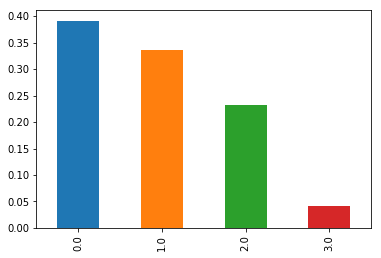

In [22]:
X['score'].value_counts(normalize=True).plot.bar()

In [23]:
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [24]:
count = X['score'].value_counts()
labels = count.index
value = np.array((count/count.sum())*100)

plot = go.Pie(labels=labels,values = value)
layout = go.Layout(title='Target Value Distribution')
fig = go.Figure(data=[plot],layout=layout)
py.iplot(fig,filename='Target Distribution')

Distribution of different scores is quite skwed

Let's see the word cloud of essay text

In [25]:
from wordcloud import STOPWORDS,WordCloud

def wcloud(text,title=None,figure_size=(24.0,16.0)):
    stopwords = set(STOPWORDS)
    stopwords = stopwords.union({'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'})
    
    wordcloud = WordCloud(stopwords=stopwords,random_state = 42,width=800, 
                    height=400,).generate(str(text))
    
    plt.figure(figsize=figure_size)
    plt.title(title,fontdict={'size': 40,})
    plt.imshow(wordcloud)

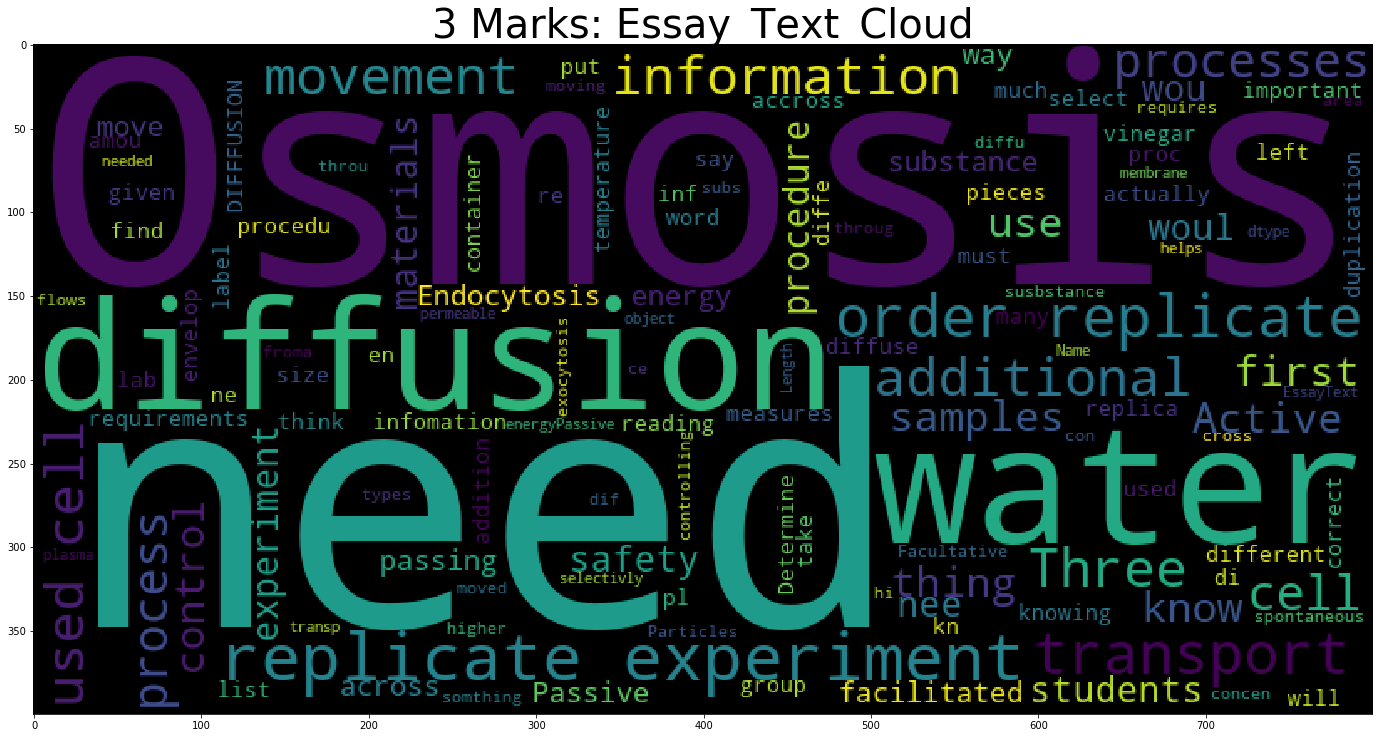

In [26]:
wcloud(X[X['score']==3]['EssayText'],'3 Marks: Essay_Text_Cloud')

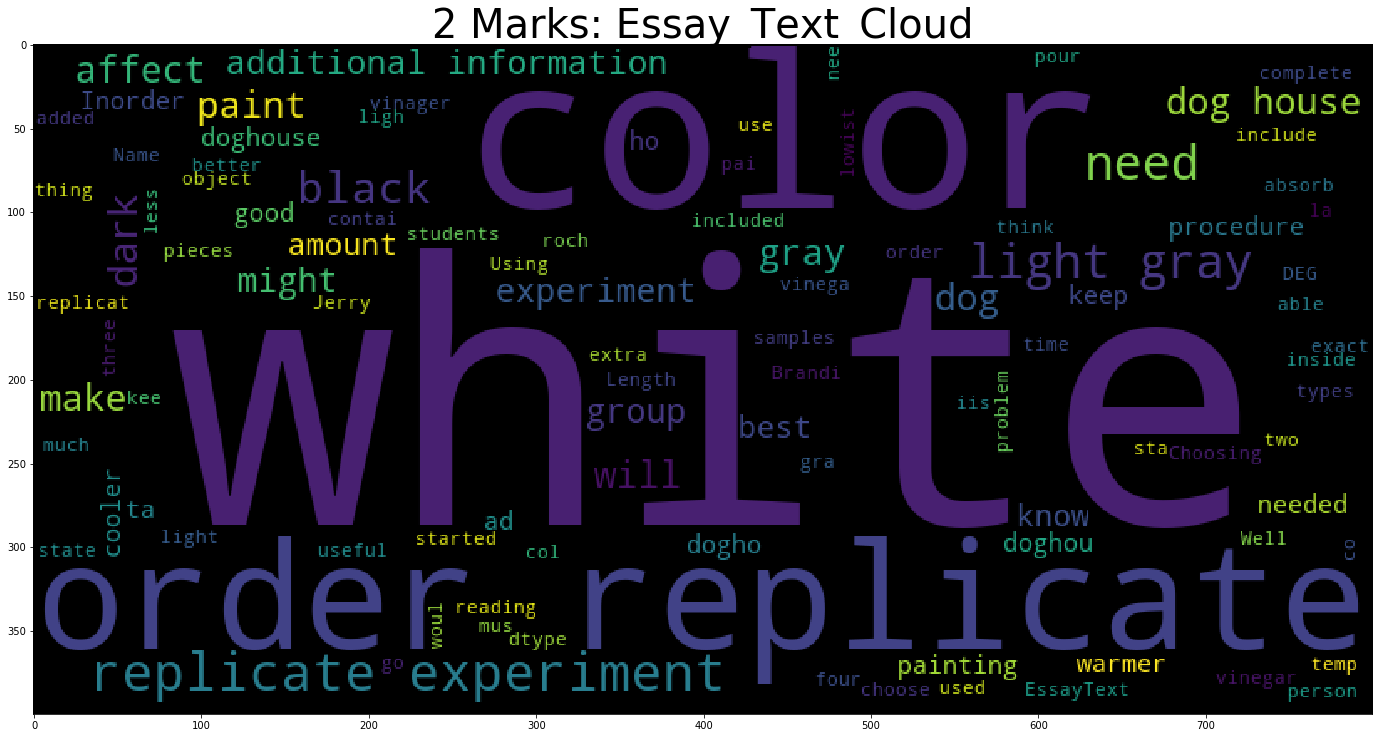

In [27]:
wcloud(X[X['score']==2]['EssayText'],'2 Marks: Essay_Text_Cloud')

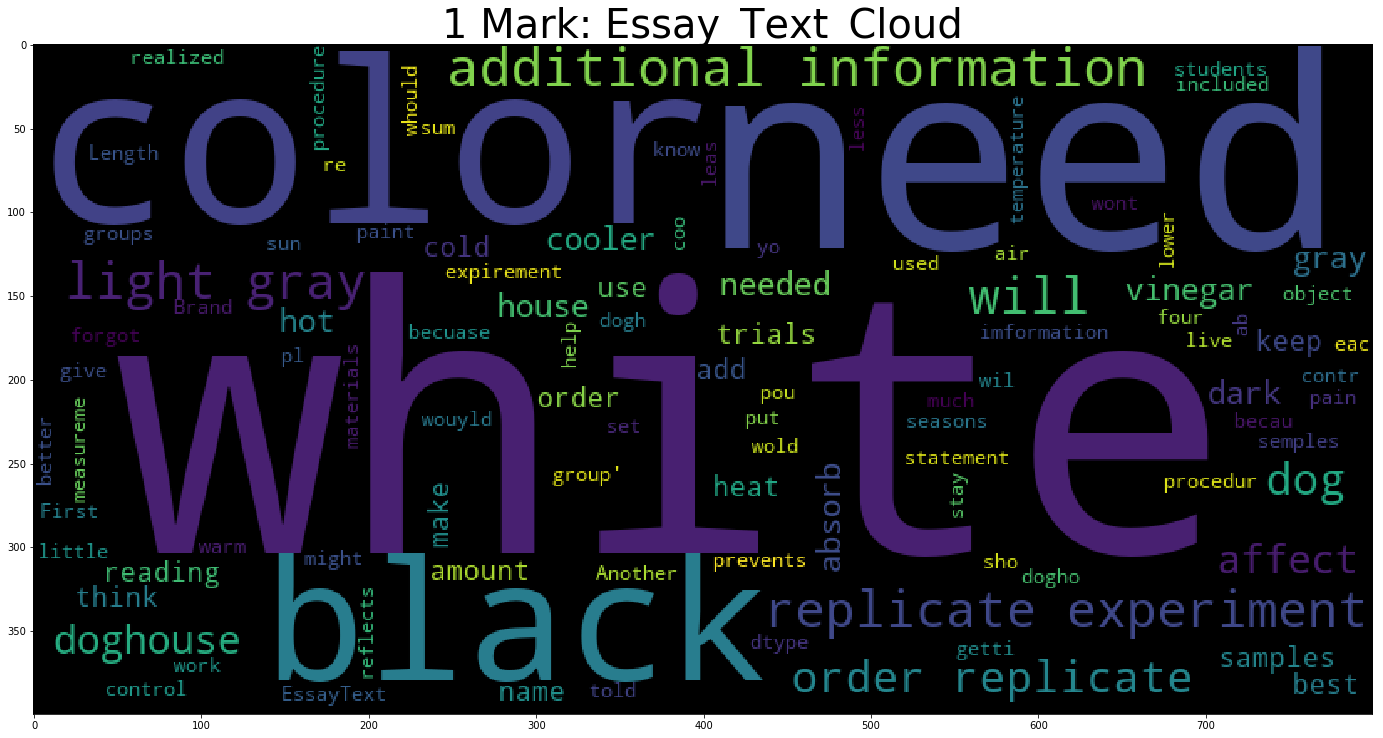

In [28]:
wcloud(X[X['score']==1]['EssayText'],'1 Mark: Essay_Text_Cloud')

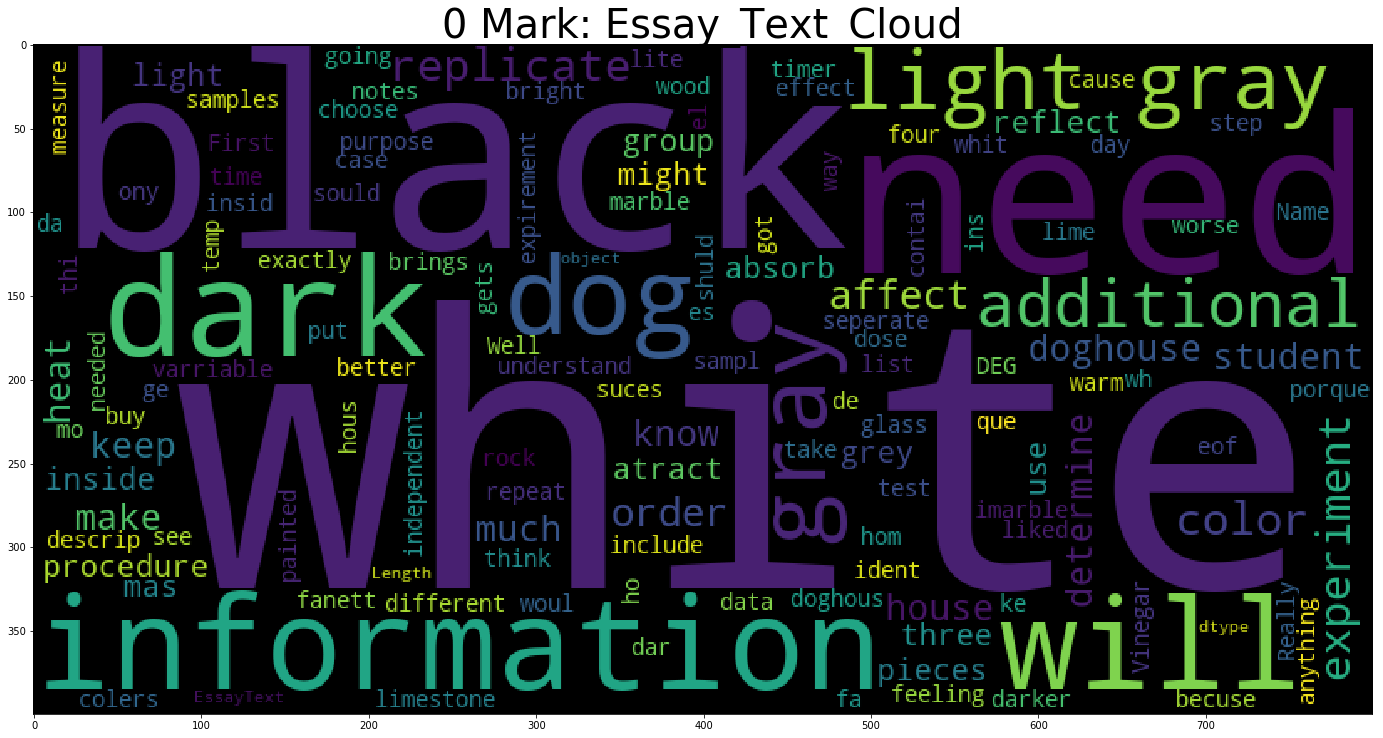

In [29]:
wcloud(X[X['score']==0]['EssayText'],'0 Mark: Essay_Text_Cloud')

From the above word clouds we can see that the highest scoring essay texts includes words such as Osmosis,Diffusion,etc and these words are coherent with the context of essay, on other hand low scoring essays includes such as white black, etc which seems to be incoherent with the context of essay

It's time to create some meta features and check out how they are distributed in the dataset:

* Number of words in the text
* Number of unique words in the text
* Number of characters in the text
* Number of stopwords
* Number of punctuations
* Number of upper case words
* Number of title case words
* Average length of the words

In [30]:
X['words'] = X['EssayText'].apply(lambda x: len(x.split()))
X_test['words'] = X_test['EssayText'].apply(lambda x: len(x.split()))

X['unique'] = X['EssayText'].apply(lambda x: len(set(x.split())))
X_test['unique'] = X_test['EssayText'].apply(lambda x: len(set(x.split())))

X['char'] = X['EssayText'].apply(lambda x: len(x))
X_test['char'] = X_test['EssayText'].apply(lambda x: len(x))

X['stop'] = X['EssayText'].apply(lambda x: len([word for word in str(x).lower().split() if word in set(STOPWORDS)]))
X_test['stop'] = X_test['EssayText'].apply(lambda x: len([word for word in str(x).lower().split() if word in set(STOPWORDS)]))

X['punct'] = X['EssayText'].apply(lambda x: len([punct for punct in str(x) if punct in string.punctuation]))
X_test['punct'] = X_test['EssayText'].apply(lambda x: len([punct for punct in str(x) if punct in string.punctuation]))

X['upper'] = X['EssayText'].apply(lambda x: len([word for word in x.split() if word.isupper()]))
X_test['upper'] = X_test['EssayText'].apply(lambda x: len([word for word in x.split() if word.isupper()]))

X['title'] = X['EssayText'].apply(lambda x: len([word for word in x.split() if word.istitle()]))
X_test['title'] = X_test['EssayText'].apply(lambda x: len([word for word in x.split() if word.istitle()]))

X['avg_word'] = X['EssayText'].apply(lambda x: (np.sum([len(word) for word in x.split()]))/len(x.split()))
X_test['avg_word'] = X_test['EssayText'].apply(lambda x: (np.sum([len(word) for word in x.split()]))/len(x.split()))

In [31]:
X.head()

,ID,Essayset,min_score,max_score,clarity,coherent,EssayText,score,words,unique,char,stop,punct,upper,title,avg_word
0,1,1.0,0,3,average,worst,Some additional information that we would need...,1.0,56,41,314,30,2,0,1,4.625000
1,2,1.0,0,3,excellent,worst,"After reading the expirement, I realized that ...",1.0,48,40,296,21,6,1,2,5.187500
2,3,1.0,0,3,worst,above_average,"What you need is more trials, a control set up...",1.0,35,34,169,17,5,0,2,3.857143
3,4,1.0,0,3,worst,worst,The student should list what rock is better an...,0.0,17,13,88,10,1,0,1,4.235294
4,5,1.0,0,3,above_average,worst,For the students to be able to make a replicat...,2.0,31,27,158,17,2,0,1,4.129032


In [32]:
X.iloc[15010].EssayText

"The author organizes the article by first grabbing the reader's attention with the sentence 'Grab your telescope!  Look up in the sky!  It's a comet!  It's a meteor!  It's a...tool bag?'.  This passage is interesting and makes the reader want to read more.  Then the reader is told that this can actually happen and that this article is going to be about space junk.  Next the reader learns what makes up space junk and why it is there.  The article explains how the space junk is the stuff that doesn't fall back to earth, so it isn't burned up in the atmosphere.  Instead it floats around in space.  The article also explains how satellites can also be considered space junk.  In the next section, crash course, we are told why satellites can be considered space junk and what happens when they collide.  We also learn how easy it is for space junk to get into space.  But by now the reader is wondering why this matters and what problems could come from these little bits of debris.  The author b

We can see that there are responses having greater than 50 words as opposed to the problem statement

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



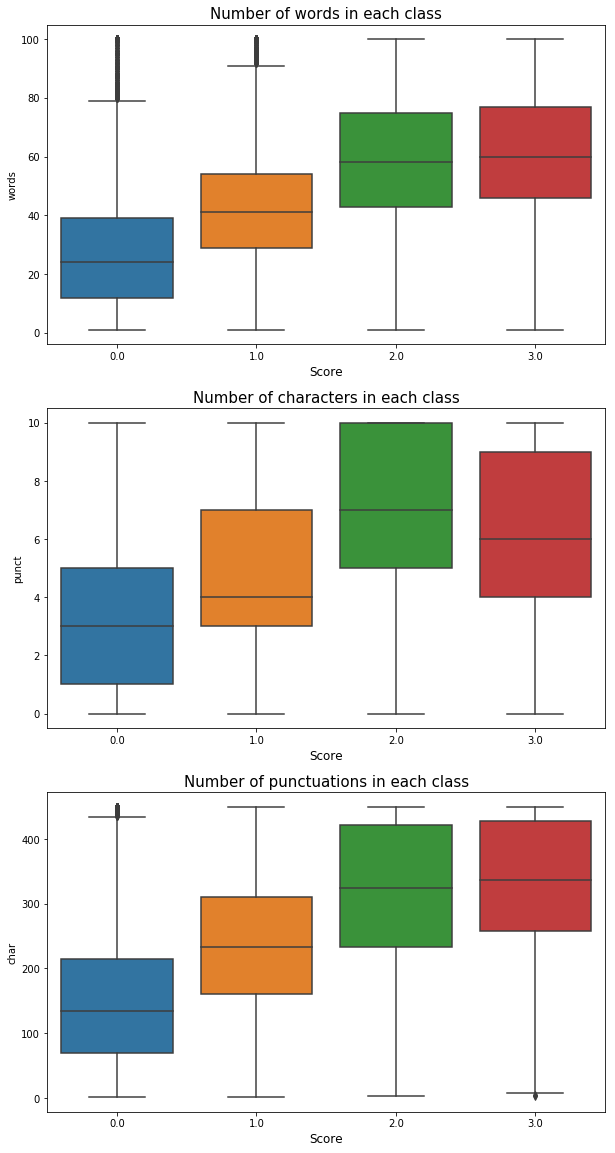

In [33]:
# Truncate some extreme values for better visuals ##
X['words'].loc[X['words']>100] = 100 #truncation for better visuals
X['punct'].loc[X['punct']>10] = 10 #truncation for better visuals
X['char'].loc[X['char']>450] = 450 #truncation for better visuals

f, axes = plt.subplots(3, 1, figsize=(10,20))
sns.boxplot(x='score', y='words', data=X, ax=axes[0])
axes[0].set_xlabel('Score', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)

sns.boxplot(x='score', y='punct', data=X, ax=axes[1])
axes[1].set_xlabel('Score', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

sns.boxplot(x='score', y='char', data=X, ax=axes[2])
axes[2].set_xlabel('Score', fontsize=12)
axes[2].set_title("Number of punctuations in each class", fontsize=15)
plt.show()

From the box plots we can see that students scoring more marks have more number of words and punctuations in their answer,these features might be useful for our model.

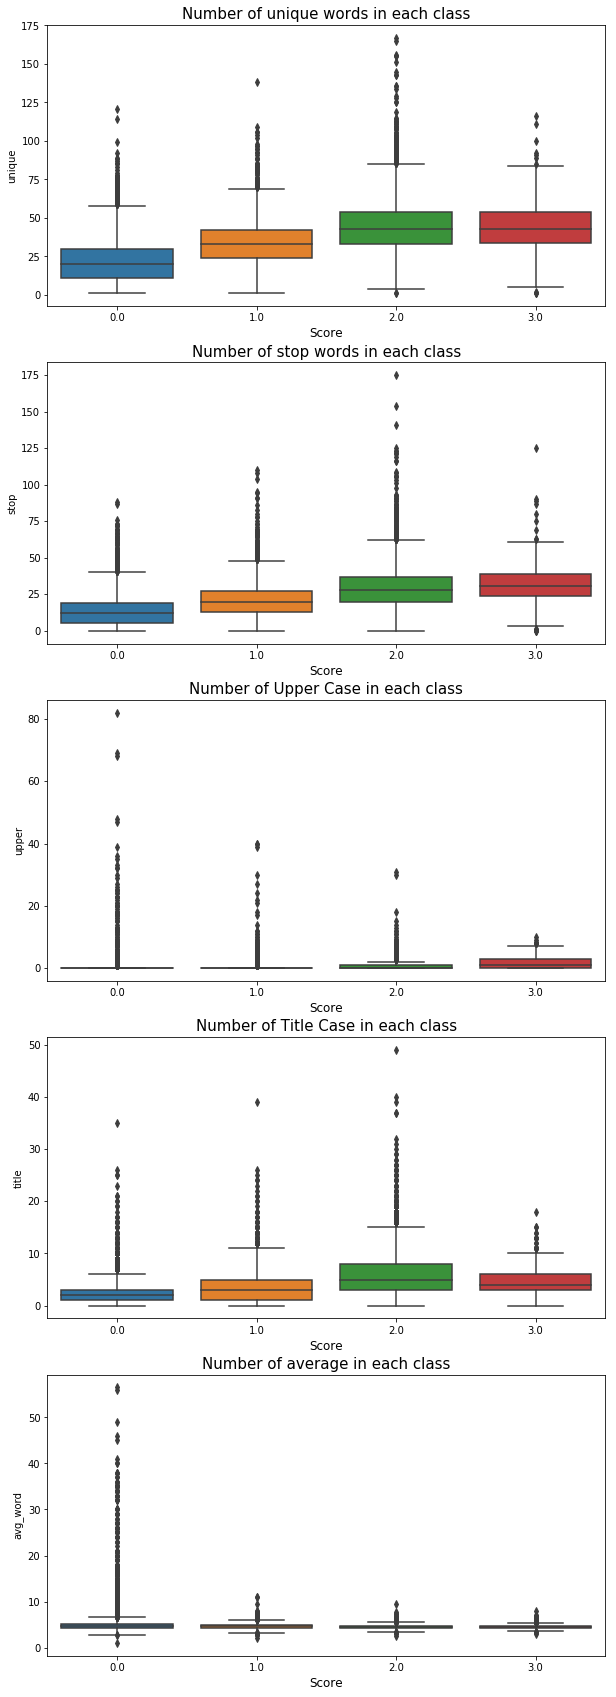

In [34]:
# X['words'].loc[X['words']>100] = 100 #truncation for better visuals
# X['punct'].loc[X['punct']>10] = 10 #truncation for better visuals
# X['char'].loc[X['char']>450] = 450 #truncation for better visuals

f, axes = plt.subplots(5, 1, figsize=(10,30))
sns.boxplot(x='score', y='unique', data=X, ax=axes[0])
axes[0].set_xlabel('Score', fontsize=12)
axes[0].set_title("Number of unique words in each class", fontsize=15)

sns.boxplot(x='score', y='stop', data=X, ax=axes[1])
axes[1].set_xlabel('Score', fontsize=12)
axes[1].set_title("Number of stop words in each class", fontsize=15)

sns.boxplot(x='score', y='upper', data=X, ax=axes[2])
axes[2].set_xlabel('Score', fontsize=12)
axes[2].set_title("Number of Upper Case in each class", fontsize=15)


sns.boxplot(x='score', y='title', data=X, ax=axes[3])
axes[3].set_xlabel('Score', fontsize=12)
axes[3].set_title("Number of Title Case in each class", fontsize=15)

sns.boxplot(x='score', y='avg_word', data=X, ax=axes[4])
axes[4].set_xlabel('Score', fontsize=12)
axes[4].set_title("Number of average in each class", fontsize=15)

plt.show()

Probably the best way to fill the missing values of clarity and cohernt columns would be on the basis of marks

In [35]:
X.clarity.value_counts()

average          5959
worst            5901
excellent        2527
above_average    2518
Name: clarity, dtype: int64

In [36]:
X['clarity'].loc[(X['clarity'].isna()==True) & (X['score'] == 0) & (X['max_score']==3.0)] = 'worst'
X['clarity'].loc[(X['clarity'].isna()==True) & (X['score'] == 1) & (X['max_score']==3.0)] = 'average'
X['clarity'].loc[(X['clarity'].isna()==True) & (X['score'] == 2) & (X['max_score']==3.0)] = 'above_average'
X['clarity'].loc[(X['clarity'].isna()==True) & (X['score'] == 3) & (X['max_score']==3.0)] = 'excellent'

X['clarity'].loc[(X['clarity'].isna()==True) & (X['score'] == 0) & (X['max_score']==2.0)] = 'worst'
X['clarity'].loc[(X['clarity'].isna()==True) & (X['score'] == 1) & (X['max_score']==2.0)] = 'average'
X['clarity'].loc[(X['clarity'].isna()==True) & (X['score'] == 2) & (X['max_score']==2.0)] = 'excellent'

X['coherent'].loc[(X['coherent'].isna()==True) & (X['score'] == 0) & (X['max_score']==3.0)] = 'worst'
X['coherent'].loc[(X['coherent'].isna()==True) & (X['score'] == 1) & (X['max_score']==3.0)] = 'average'
X['coherent'].loc[(X['coherent'].isna()==True) & (X['score'] == 2) & (X['max_score']==3.0)] = 'above_average'
X['coherent'].loc[(X['coherent'].isna()==True) & (X['score'] == 3) & (X['max_score']==3.0)] = 'excellent'

X['coherent'].loc[(X['coherent'].isna()==True) & (X['score'] == 0) & (X['max_score']==2.0)] = 'worst'
X['coherent'].loc[(X['coherent'].isna()==True) & (X['score'] == 1) & (X['max_score']==2.0)] = 'average'
X['coherent'].loc[(X['coherent'].isna()==True) & (X['score'] == 2) & (X['max_score']==2.0)] = 'excellent'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [37]:
X.isna().sum()

ID           0
Essayset     0
min_score    0
max_score    0
clarity      0
coherent     0
EssayText    0
score        0
words        0
unique       0
char         0
stop         0
punct        0
upper        0
title        0
avg_word     0
dtype: int64

As clarity and coherncy are ordinal values we will be encoding them to numerical one

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le_clarity = LabelEncoder()
le_coherent = LabelEncoder()

X['clarity'] = le_clarity.fit_transform(X['clarity'])
X_test['clarity'] = le_clarity.transform(X_test['clarity'])

X['coherent'] = le_coherent.fit_transform(X['coherent'])
X_test['coherent'] = le_coherent.transform(X_test['coherent'])

In [40]:
X = X.drop(labels = ['ID','min_score','max_score','EssayText','avg_word'],axis=1)
X_test = X_test.drop(labels = ['ID','min_score','max_score','EssayText','avg_word'],axis=1)

In [41]:
X.head()

,Essayset,clarity,coherent,score,words,unique,char,stop,punct,upper,title
0,1.0,1,3,1.0,56,41,314,30,2,0,1
1,1.0,2,3,1.0,48,40,296,21,6,1,2
2,1.0,3,0,1.0,35,34,169,17,5,0,2
3,1.0,3,3,0.0,17,13,88,10,1,0,1
4,1.0,0,3,2.0,31,27,158,17,2,0,1


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,classification_report, log_loss,f1_score
from sklearn.svm import LinearSVC

In [43]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)
eng_features = ['Essayset','clarity','coherent','words','unique','char','stop','punct','upper','title']
cv_scores = []
pred_val = np.zeros([X.shape[0]])
for train_index, val_index in kf.split(X):
    X_train, X_val = X.loc[train_index][eng_features].values,X.loc[val_index][eng_features].values
    y_train, y_val = X.loc[train_index]['score'].values,X.loc[val_index]['score'].values
    classifier = LogisticRegression(penalty= 'l1',class_weight='balanced', C = 1.0,
                                    multi_class = 'auto',solver='liblinear',random_state=42,max_iter=200)
    classifier.fit(X_train,y_train)
    pred_prob = classifier.predict_proba(X_val)
    pred = classifier.predict(X_val)
    pred_val[val_index] = pred
    print(accuracy_score(y_val,pred))

0.6403637430331476
0.6353769433851569
0.6377236726312702
0.6235328638497653
0.6402582159624414


In [44]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [45]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)
eng_features = ['Essayset','clarity','coherent','words','unique','char','stop','punct','upper','title']
cv_scores = []
pred_val = np.zeros([X.shape[0]])
for train_index, val_index in kf.split(X):
    X_train, X_val = X.loc[train_index][eng_features].values,X.loc[val_index][eng_features].values
    y_train, y_val = X.loc[train_index]['score'].values,X.loc[val_index]['score'].values
    
    rfc = RandomForestClassifier(n_estimators = 70,random_state=42,n_jobs=-1,criterion='entropy',
                                min_samples_leaf=20,min_samples_split=10)
    rfc.fit(X_train,y_train)
    
    pred_prob = rfc.predict_proba(X_val)
    pred = rfc.predict(X_val)
    pred_val[val_index] = pred
    print(accuracy_score(y_val,pred))

0.7494866529774127
0.7400997359929599
0.7301261366969786
0.7403169014084507
0.7552816901408451


In [46]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)
eng_features = ['Essayset','clarity','coherent','words','unique','char','stop','punct','upper','title']
cv_scores = []
pred_val = np.zeros([X.shape[0]])
for train_index, val_index in kf.split(X):
    X_train, X_val = X.loc[train_index][eng_features].values,X.loc[val_index][eng_features].values
    y_train, y_val = X.loc[train_index]['score'].values,X.loc[val_index]['score'].values
    
    abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42,
                                                                   criterion='entropy',
                                                                   min_samples_leaf=20,
                                                                   min_samples_split=10))
    abc.fit(X_train,y_train)
    
    pred_prob = abc.predict_proba(X_val)
    pred = abc.predict(X_val)
    pred_val[val_index] = pred
    print(accuracy_score(y_val,pred))

0.6990319741859783
0.6949251980052802
0.6981519507186859
0.6977699530516432
0.7039319248826291


In [47]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)
eng_features = ['Essayset','clarity','coherent','words','unique','char','stop','punct','upper','title']
cv_scores = []
pred_val = np.zeros([X.shape[0]])
for train_index, val_index in kf.split(X):
    X_train, X_val = X.loc[train_index][eng_features].values,X.loc[val_index][eng_features].values
    y_train, y_val = X.loc[train_index]['score'].values,X.loc[val_index]['score'].values
    
    etc = ExtraTreesClassifier(n_estimators = 30,random_state=42,n_jobs=-1,criterion='entropy',
                               min_samples_leaf=10,min_samples_split=10)
    etc.fit(X_train,y_train)
    
    pred_prob = etc.predict_proba(X_val)
    pred = etc.predict(X_val)
    pred_val[val_index] = pred
    print(accuracy_score(y_val,pred))

0.7456732179524788
0.7406864183044881
0.7312995013200352
0.7473591549295775
0.7523474178403756


In [48]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)
eng_features = ['Essayset','clarity','coherent','words','unique','char','stop','punct','upper','title']
cv_scores = []
pred_val = np.zeros([X.shape[0]])
for train_index, val_index in kf.split(X):
    X_train, X_val = X.loc[train_index][eng_features].values,X.loc[val_index][eng_features].values
    y_train, y_val = X.loc[train_index]['score'].values,X.loc[val_index]['score'].values
    
    knb = KNeighborsClassifier(n_neighbors=15, weights='distance',n_jobs=-1)
    knb.fit(X_train,y_train)
    
    pred_prob = knb.predict_proba(X_val)
    pred = knb.predict(X_val)
    pred_val[val_index] = pred
    print(accuracy_score(y_val,pred))

0.5928424757993547
0.5793487826342035
0.5831622176591376
0.5771713615023474
0.5877347417840375


In [49]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)
eng_features = ['Essayset','clarity','coherent','words','unique','char','stop','punct','upper','title']
cv_scores = []
pred_val = np.zeros([X.shape[0]])
for train_index, val_index in kf.split(X):
    X_train, X_val = X.loc[train_index][eng_features].values,X.loc[val_index][eng_features].values
    y_train, y_val = X.loc[train_index]['score'].values,X.loc[val_index]['score'].values
    
    mnb = MultinomialNB()
    mnb.fit(X_train,y_train)
    
    pred_prob = mnb.predict_proba(X_val)
    pred = mnb.predict(X_val)
    pred_val[val_index] = pred
    print(accuracy_score(y_val,pred))

0.5775887356996187
0.5714285714285714
0.5661484306248167
0.5692488262910798
0.5774647887323944


We can see that for our dataset Random Forest Classifier Model is giving the best results, we will be using that model to produce final result

In [50]:
pred_sub = rfc.predict(X_test)
X_test['essay_score'] = pred_sub
X_test.head()
sub = test.copy()
sub['essay_score'] = pred_sub
sub = sub.drop(labels=['min_score','max_score','clarity','coherent','EssayText'],axis=1)
sub.columns = ['id','essay_set', 'essay_score']
sub.head()

,id,essay_set,essay_score
0,1673,1,1.0
1,1674,1,0.0
2,1675,1,3.0
3,1676,1,0.0
4,1677,1,0.0


In [51]:
sub.to_csv(path_or_buf = 'submission.csv',index=False)